[decisiontree](https://docs.google.com/document/d/1sVouUJvH8sl64Jw5CijJGKtpY3CEcWKMXTE9Dfrc2sE/edit)

[Ensemble Learning](https://docs.google.com/document/d/198bGg_mPM-P7qskLqwxFjJUVrosrFnIwsT-Gb4plGtM/edit)

[document](https://docs.google.com/document/d/1TOr5eifhDDeqtizzpk4qDPC9D9LjOwxFOZPbcIBBAEU/edit)

![Kyphosis](https://www.mdpi.com/applsci/applsci-09-03322/article_deploy/html/images/applsci-09-03322-g002-550.jpg)
**(a)** A normal spine (without kyphosis); **(b)** Patient with abnormal spine (kyphosis).


**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation


In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
data.shape

(81, 4)

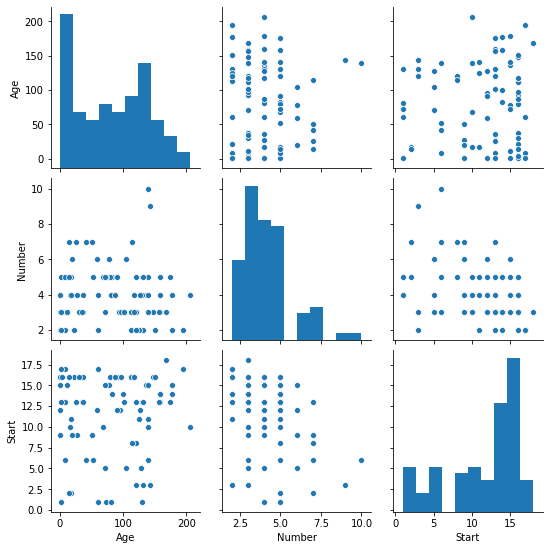

In [4]:
sns.pairplot(data)

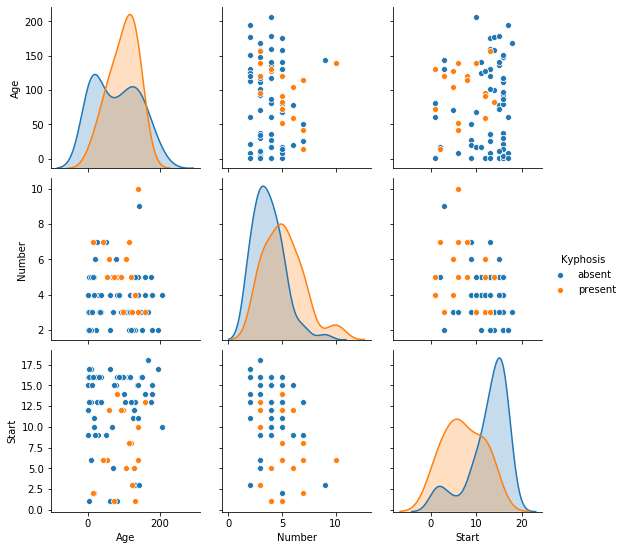

In [5]:
sns.pairplot(data , hue='Kyphosis')

In [6]:
# Splitting the data set into Input and output

#X = data.iloc[:,1:]
X = data.drop('Kyphosis',axis=1)
y = data.Kyphosis

In [23]:
X_train

,Age,Number,Start
2,128,4,5
35,93,3,16
33,112,3,16
45,139,3,10
15,1,3,16
...,...,...,...
75,178,4,15
9,59,6,12
72,87,4,16
12,18,5,2


In [24]:
y_train

2     present
35     absent
33     absent
45    present
15     absent
       ...   
75     absent
9     present
72     absent
12     absent
37    present
Name: Kyphosis, Length: 64, dtype: object

In [8]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
#Apply the Desision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

#initialization of object
dtree = DecisionTreeClassifier(criterion='entropy')

# Applying the classifier to the dataset
#Syntax : objectname.fit(InputValues , OutputValues)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

dtree.fit(X,y) #  Model will be built on all the 81 records --> but if i want to test the performance
 of the model,I need some data to test

 Accuracy --98%

 New data point --> 50%

dtree.fit(X,y)--> prediction i took a single row, on some number of rows

In [10]:
#predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred 

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [11]:
# Classification Report on training data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [12]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [13]:
# Prediction on test data(unseen data)
# Syntax: objectname.predict(InputValues)
y_test_pred = dtree.predict(X_test) # Corresponding output of X_test is stored in y_test
# Compare the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



[Text(167.40000000000003, 205.35999999999999, 'X[2] <= 12.5\nentropy = 0.728\nsamples = 64\nvalue = [51, 13]'),
 Text(133.92000000000002, 181.2, 'X[0] <= 34.5\nentropy = 0.999\nsamples = 27\nvalue = [14, 13]'),
 Text(66.96000000000001, 157.04, 'X[1] <= 6.0\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(33.480000000000004, 132.88, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(100.44000000000001, 132.88, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 157.04, 'X[0] <= 141.0\nentropy = 0.949\nsamples = 19\nvalue = [7, 12]'),
 Text(167.40000000000003, 132.88, 'X[1] <= 5.5\nentropy = 0.874\nsamples = 17\nvalue = [5, 12]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 83.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(66.96000000000001, 84.56, 'X[0] <= 56.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(33.480000000000004, 60.400000000000006, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 60.400000000000006, 'en

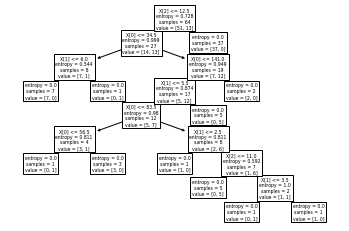

In [14]:
# Visualization of the Decision Tree

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
tree.plot_tree(dtree)

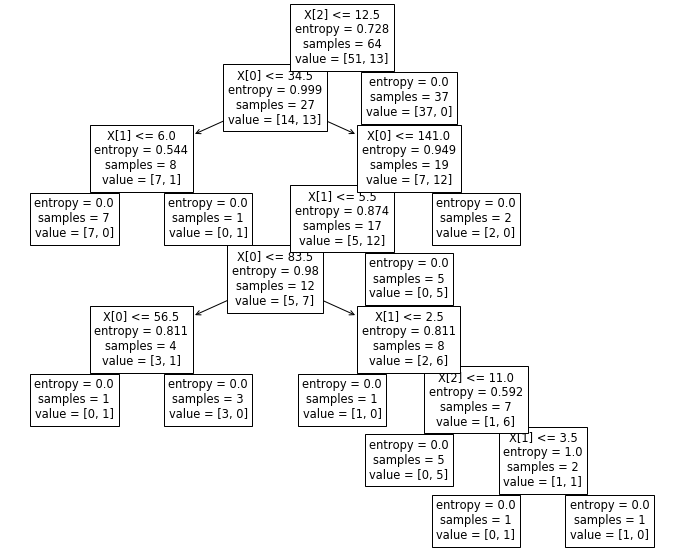

In [15]:
# Visualization of the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtree)
plt.show()

In [16]:
# KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, X_train , y_train,cv=5)


array([0.76923077, 0.92307692, 0.76923077, 0.76923077, 0.75      ])

 KFOLD = 5
5 iterations -- > in each and every iteration, it creates 5 parts --> 4 parts for training and remaining one part for test

[overfitting and underfitting](https://docs.google.com/document/d/1JsHr8g0RXfQGNmHXsDyxMSRXXBjXZ6Dy_8fPTVeP__0/edit)

In [31]:
# Without splitting if we directly build the mode --> we will not able to test

In [57]:
# Hyperrparameters
# GridsearchCV --> Find optimum parameters
#passing list of values in a dictionary to find the optimum value for each parameter
grid_param = {'criterion': ['gini','entropy'],
             'max_depth':range(2,32,1),
             'min_samples_leaf' : range(1,10,1)}

In [58]:
# Import the gridseachCV
from sklearn.model_selection import GridSearchCV

#initialization of gridSearch with the parameters - ModelName and the dictionary of parameters
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [59]:
# return the optimal parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 7}

In [60]:
# build the model with best parameters
# Initialized the DT Classifier
clf = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=7)

#we need to fit the model to thr data
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
# Prediction on test data
pred_test = clf.predict(X_test)

#Classification Report of actual values and predicted value(gridSearch)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.82      0.69      0.75        13
     present       0.33      0.50      0.40         4

    accuracy                           0.65        17
   macro avg       0.58      0.60      0.58        17
weighted avg       0.70      0.65      0.67        17



after applying gridsearch , we can say that scores have been increases to some extent

[6th july-doc](https://docs.google.com/document/d/1npaPguMRQfEw_OkUMe_tpG_n05i6F4aqUFoPYY70p60/edit)

[Ensemble learning](https://docs.google.com/document/d/1QU40_xF39MyPZlKsBbkUi9Lt2ZChiOh_WJ0ISYQps9Y/edit)

### Random Foresr Classification

In [62]:
# Import , initialize and fit

#Import the RFC sklearn
from sklearn.ensemble import RandomForestClassifier

#initialize the object for RFC
rfc = RandomForestClassifier(n_estimators = 40)

#fit the RFC to the dataset
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[rfc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [63]:
# Predictions on Training data
# SYntax : Objectname.predict(InputValues)
y_pred_train = rfc.predict(X_train)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [64]:
# Prediction on test data (unseen data)
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      absent       0.75      0.92      0.83        13
     present       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [66]:
#CrossValidationScore
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_train,y_train,cv=5)
np.mean(scores)

0.8589743589743589

In [1]:
# GridSearch for Random Forest Classifier 

[boosting](https://docs.google.com/document/d/1jT_gtvnwPPTdek27dc3VtX-wAxSim5EPLvOqPqaxob4/edit)